<a href="https://colab.research.google.com/github/Gauranga2022/DMML-Course-CMI-2023-25/blob/main/DMML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Customer Churn
The customer churn dataset dataset captures customer interactions with an online retail store. This document describes the data fields.

For this dataset, build two classifiers to predict Churn:
1. one using Adaboost and
2. one using random forest.

Use a suitable evaluation metric to compare the performance of the classifiers.



In [211]:
# Data processing
import numpy as np
import pandas as pd
import random
# Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score,precision_recall_fscore_support, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint
# visualisation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("/content/customer-churn-data.csv")

In [78]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


### Preprocessing

In [79]:
df['Gender'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [80]:
df['Gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)

In [81]:
df['EmailOptIn'].unique()

array([ True, False])

In [82]:
df['EmailOptIn'].replace([True, False],[0,1], inplace=True)

In [83]:
df['PromotionResponse'].unique()

array(['Responded', 'Ignored', 'Unsubscribed'], dtype=object)

In [84]:
df['PromotionResponse'].replace(['Responded', 'Ignored', 'Unsubscribed'],[0,1,2], inplace=True)

In [85]:
df['Churn'].unique()

array([ True, False])

In [86]:
df['Churn'].replace([True, False],[0,1],inplace=True)

In [87]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,0,0,0
1,2,65,0,79.51,9025.47,13,77,22.90,2,2,3,227,1,0,1
2,3,18,0,29.19,618.83,13,71,50.53,5,2,2,283,1,0,0
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,0,1,0
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,1,2,1


In [88]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X, y

(     CustomerID  Age  Gender  AnnualIncome  TotalSpend  YearsAsCustomer  \
 0             1   62       2         45.15     5892.58                5   
 1             2   65       0         79.51     9025.47               13   
 2             3   18       0         29.19      618.83               13   
 3             4   21       2         79.63     9110.30                3   
 4             5   21       2         77.66     5390.88               15   
 ..          ...  ...     ...           ...         ...              ...   
 995         996   54       0        143.72     1089.09                2   
 996         997   19       0        164.19     3700.24                9   
 997         998   47       1        113.31      705.85               17   
 998         999   23       0         72.98     3891.60                7   
 999        1000   34       2        134.86     3956.71               15   
 
      NumOfPurchases  AvgTransactionAmount  NumOfReturns  NumOfSupportQueries  \
 0   

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.6, random_state=32, shuffle=True)

In [90]:
len(X_test), len(X_train)

(400, 600)

## PCA and LLE for visualisation

### PCA

In [91]:
scaler = StandardScaler()

In [92]:
scaled_data = scaler.fit_transform(df)

In [93]:
scaled_data[0]

array([-1.73031962,  1.22962809,  1.24520665, -1.26497333,  0.28377308,
       -0.85423954, -0.96237837,  1.28204967, -0.90211443, -1.37944388,
        0.01868945, -0.51648897, -0.94358845, -1.22405644, -0.9492843 ])

In [94]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

array([0.51249126, 0.48750874])

In [95]:
print(pca.explained_variance_ratio_)

[0.08085658 0.07691505]


In [96]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

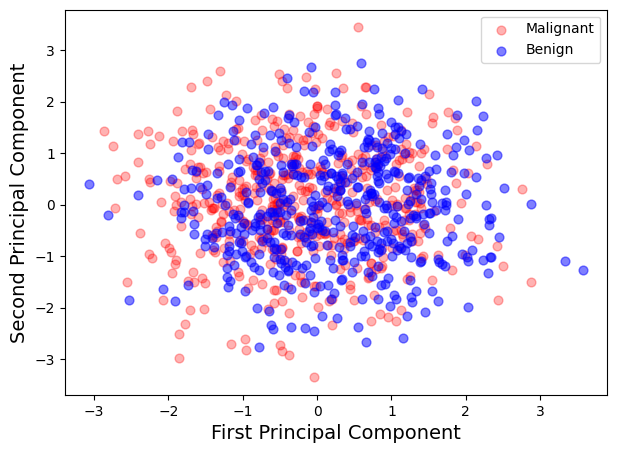

In [97]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
cdict={0:'red',1:'blue'}
marker={0:'o',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

## Random Forest (testing)

In [98]:
rf = RandomForestClassifier(random_state=32)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=32)

In [99]:
Y_pred = rf.predict(X_test)

In [100]:
accuracy = accuracy_score(Y_test, Y_pred)

In [101]:
print(accuracy)

0.4675


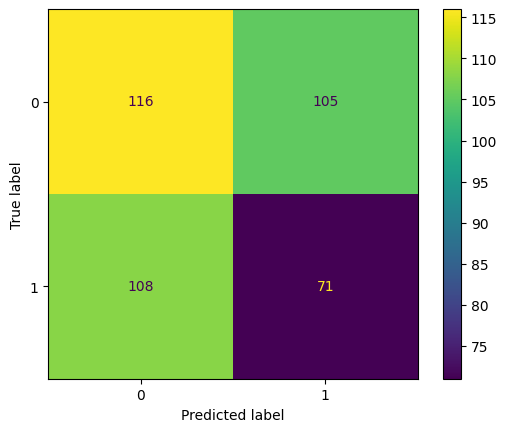

In [102]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [103]:
l = ['precision', 'recall', 'fscore']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred)]
for i in range(3):
  print(l[i], '=', scores[i])

precision = 0.4034090909090909
recall = 0.39664804469273746
fscore = 0.4


## Random Forest with Hyperparameter Tuning

In [104]:
param_dist = {'n_estimators': randint(50,300),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=20,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7837d23eda20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7837d41b8d00>})

In [105]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 197}


In [106]:
# Generate predictions with the best model
Y_pred = best_rf.predict(X_test)

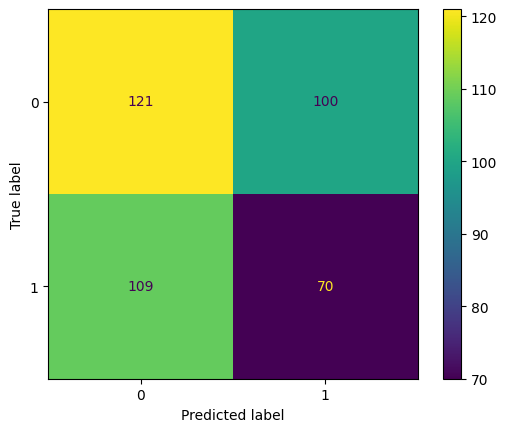

In [107]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [108]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4117647058823529
recall = 0.39106145251396646
fscore = 0.40114613180515757
accuracy-score = 0.4775


In [109]:
corr = df.corr() #Correlation Matrix
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-109-eb96cffa9096>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
CustomerID,1.00,0.01,0.02,-0.02,-0.02,-0.02,0.02,-0.01,0.00,-0.04,0.02,-0.01,-0.02,-0.00,-0.04
Age,0.01,1.00,-0.09,0.04,-0.03,-0.02,0.03,0.01,0.00,-0.02,0.02,0.01,-0.00,-0.02,0.01
Gender,0.02,-0.09,1.00,-0.07,0.02,0.02,-0.04,0.02,-0.03,-0.01,-0.05,-0.00,-0.02,0.05,-0.04
AnnualIncome,-0.02,0.04,-0.07,1.00,0.02,-0.03,0.03,0.01,0.04,0.02,0.02,0.04,-0.01,0.01,0.04
TotalSpend,-0.02,-0.03,0.02,0.02,1.00,0.04,0.05,-0.09,0.01,-0.04,-0.00,-0.04,-0.03,0.01,-0.03
YearsAsCustomer,-0.02,-0.02,0.02,-0.03,0.04,1.00,0.02,-0.02,0.04,-0.01,-0.03,-0.01,0.04,0.04,0.03
NumOfPurchases,0.02,0.03,-0.04,0.03,0.05,0.02,1.00,-0.02,-0.00,0.01,0.01,-0.04,-0.01,0.05,0.03
AvgTransactionAmount,-0.01,0.01,0.02,0.01,-0.09,-0.02,-0.02,1.00,0.01,0.04,0.02,0.03,0.03,0.05,0.02
NumOfReturns,0.00,0.00,-0.03,0.04,0.01,0.04,-0.00,0.01,1.00,0.08,-0.00,0.04,0.01,-0.02,-0.00
NumOfSupportQueries,-0.04,-0.02,-0.01,0.02,-0.04,-0.01,0.01,0.04,0.08,1.00,0.03,-0.02,-0.02,0.02,-0.01


## Adaboost (testing)

```Base learner : Decision Tree```

In [110]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=1)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200)

In [111]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [112]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4293193717277487
recall = 0.4581005586592179
fscore = 0.44324324324324327
accuracy-score = 0.485


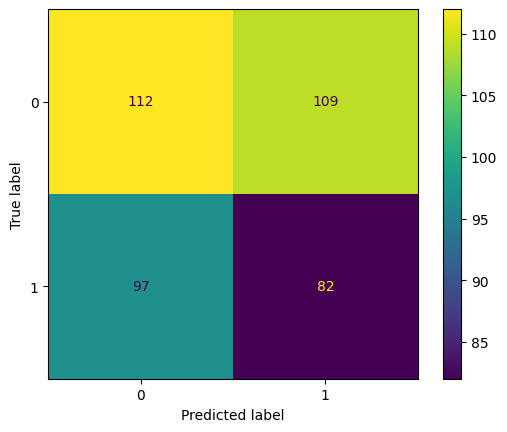

In [113]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

```Base Learner: Logistic Regression```

In [114]:
ada_clf = AdaBoostClassifier(LogisticRegression(random_state=32), n_estimators=2000, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AdaBoostClassifier(algorithm='SAMME',
                   estimator=LogisticRegression(random_state=32),
                   learning_rate=1, n_estimators=2000)

In [115]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [116]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4519774011299435
recall = 0.44692737430167595
fscore = 0.44943820224719094
accuracy-score = 0.51


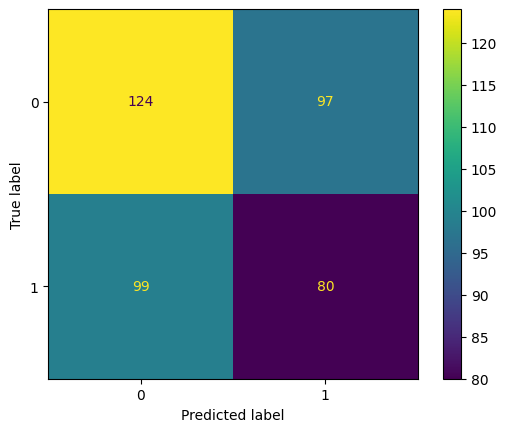

In [117]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

```Base Learner: SVC```

In [118]:
ada_clf = AdaBoostClassifier(SVC(probability=True, kernel = 'linear'), n_estimators=50, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(kernel='linear', probability=True),
                   learning_rate=1)

In [119]:
model = ada_clf.fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [120]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.43023255813953487
recall = 0.4134078212290503
fscore = 0.42165242165242167
accuracy-score = 0.4925


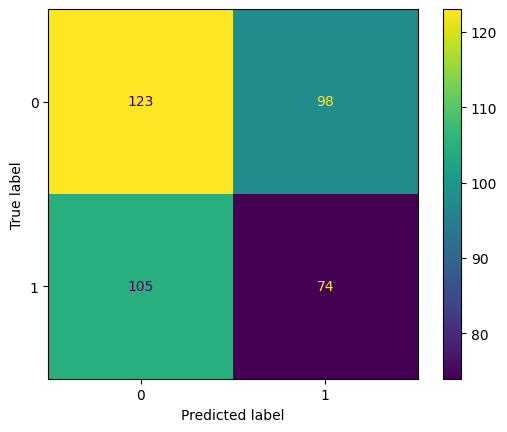

In [121]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# display
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Adaboost with Hyperparameter Tuning

``` Base Learner: Decision Stumps```

In [122]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,random_state = 32))

parameters = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,0.5,1]}

grid_search = GridSearchCV(ada_clf, parameters,verbose=3,scoring='f1',n_jobs=-1)
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=32)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1', verbose=3)

In [123]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 250}


In [124]:
# Generate predictions with the best model
Y_pred = best_rf.predict(X_test)

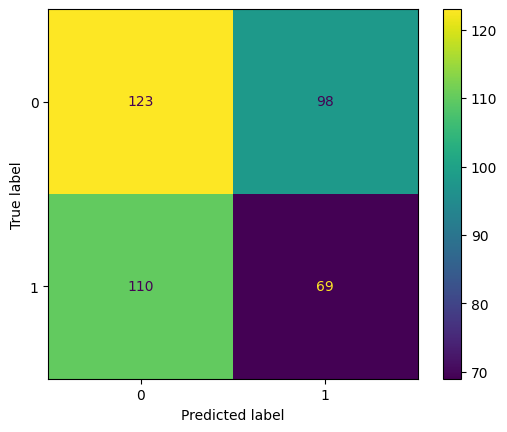

In [125]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [127]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.41317365269461076
recall = 0.3854748603351955
fscore = 0.3988439306358382
accuracy-score = 0.48


## Random Guessing

In [128]:
Y_rand_pred = np.array([random.randint(0,1) for _ in range(400)]) #randomly generate 0 or 1 400 times.

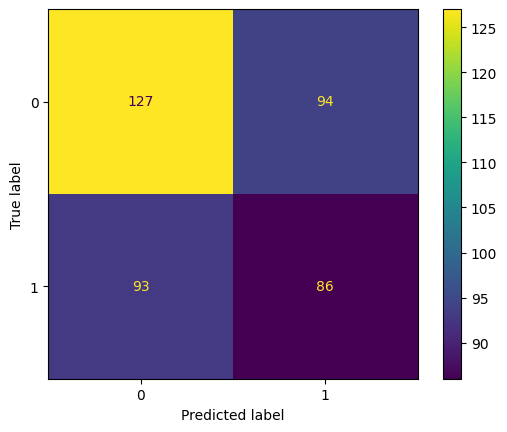

In [129]:
cm = confusion_matrix(Y_test, Y_rand_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [130]:
l = ['precision', 'recall', 'fscore', 'accuracy-score'] #find the precision, recall and fscore of the best model
scores = [precision_score(Y_test, Y_rand_pred),recall_score(Y_test, Y_rand_pred), f1_score(Y_test, Y_rand_pred), accuracy_score(Y_test, Y_rand_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4777777777777778
recall = 0.48044692737430167
fscore = 0.479108635097493
accuracy-score = 0.5325


## Best accuracy scores:
1. Random Forest: Best accuracy-score = 0.485 #fast
2. Adaboost: Best accuracy-score = 0.485 #slow
3. Random guessing: best accuracy-score = 0.51 which is
larger than both Random Forest and adaboost's accuracy scores!

# Task 2: Supermarket sales
The supermarket sales dataset has sales data for a supermarket with three branches. This document describes the data fields.

You have two tasks for this dataset.

1. Build two classifiers to predict Gender, one using a decision tree and one using a random forest. Use a suitable evaluation metric to compare the performance of the classifiers.

2. Build two models to predict Rating, one using linear regression and one using a decision tree regressor. Use a suitable evaluation metric to compare the performance of the models.

## Preprocessing

In [454]:
df1 = pd.read_csv("/content/supermarket-sales-data.csv")

In [455]:
df1.head()

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


In [456]:
for i in range(0,1000):
  df1['InvoiceID'][i] = i+1

<ipython-input-456-9586bcfef013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceID'][i] = i+1


In [457]:
df1['InvoiceID'][55]

56

In [458]:
df1['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [459]:
df1['Branch'].replace(['A','B','C'],[0,1,2],inplace=True)

In [460]:
df1['CustomerType'].unique()

array(['Member', 'Normal'], dtype=object)

In [461]:
df1['CustomerType'].replace(['Member','Normal'],[0,1],inplace=True)

In [462]:
df1['CustomerType']

0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    0
998    1
999    0
Name: CustomerType, Length: 1000, dtype: int64

In [463]:
df1['ProductType'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [464]:
df1['ProductType'].replace(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'],[0,1,2,3,4,5],inplace=True)

In [465]:
df1['ProductType']

0      0
1      1
2      2
3      0
4      3
      ..
995    0
996    2
997    4
998    2
999    5
Name: ProductType, Length: 1000, dtype: int64

In [466]:
df1['PaymentType'].unique()

array(['UPI', 'Cash', 'Credit card'], dtype=object)

In [467]:
df1['PaymentType'].replace(['UPI', 'Cash', 'Credit card'],[0,1,2],inplace=True)

In [468]:
df1['PaymentType']

0      0
1      1
2      2
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    1
Name: PaymentType, Length: 1000, dtype: int64

In [469]:
df1.head(-1)

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,1,0,0,Female,0,74.69,7,26.1415,548.9715,0,9.1
1,2,2,1,Female,1,15.28,5,3.8200,80.2200,1,9.6
2,3,0,1,Male,2,46.33,7,16.2155,340.5255,2,7.4
3,4,0,0,Male,0,58.22,8,23.2880,489.0480,0,8.4
4,5,0,1,Male,3,86.31,7,30.2085,634.3785,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...
994,995,2,0,Female,1,60.95,1,3.0475,63.9975,0,5.9
995,996,2,1,Male,0,40.35,1,2.0175,42.3675,0,6.2
996,997,1,1,Female,2,97.38,10,48.6900,1022.4900,0,4.4
997,998,0,0,Male,4,31.84,1,1.5920,33.4320,1,7.7


In [470]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [471]:
df1['Gender'].replace(['Female', 'Male'],[1,0],inplace=True)

In [472]:
df1['Gender'][:10]

0    1
1    1
2    0
3    0
4    0
5    0
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

In [473]:
X = df1.drop('Gender', axis = 1)
y = df1['Gender']
X[:5], y[:5]

(  InvoiceID  Branch  CustomerType  ProductType  UnitPrice  Quantity      Tax  \
 0         1       0             0            0      74.69         7  26.1415   
 1         2       2             1            1      15.28         5   3.8200   
 2         3       0             1            2      46.33         7  16.2155   
 3         4       0             0            0      58.22         8  23.2880   
 4         5       0             1            3      86.31         7  30.2085   
 
       Total  PaymentType  Rating  
 0  548.9715            0     9.1  
 1   80.2200            1     9.6  
 2  340.5255            2     7.4  
 3  489.0480            0     8.4  
 4  634.3785            0     5.3  ,
 0    1
 1    1
 2    0
 3    0
 4    0
 Name: Gender, dtype: int64)

In [474]:
X[:5]

,InvoiceID,Branch,CustomerType,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,1,0,0,0,74.69,7,26.1415,548.9715,0,9.1
1,2,2,1,1,15.28,5,3.8200,80.2200,1,9.6
2,3,0,1,2,46.33,7,16.2155,340.5255,2,7.4
3,4,0,0,0,58.22,8,23.2880,489.0480,0,8.4
4,5,0,1,3,86.31,7,30.2085,634.3785,0,5.3


In [475]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)
X_train = X_train.astype('int')
X_test = X_test.astype('int')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [476]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# Y_train = np.array(Y_train).reshape(-1, 1)
# Y_train = scaler.fit_transform(Y_train)

In [477]:
X_train[:5]

,InvoiceID,Branch,CustomerType,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
550,551,1,1,5,57,3,8,180,0,6
469,470,2,0,1,98,1,4,103,1,8
587,588,0,1,3,43,5,10,226,0,7
200,201,2,0,3,19,6,5,120,2,6
536,537,1,0,5,73,1,3,77,2,5


In [478]:
df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,1,0,0,1,0,74.69,7,26.1415,548.9715,0,9.1
1,2,2,1,1,1,15.28,5,3.8200,80.2200,1,9.6
2,3,0,1,0,2,46.33,7,16.2155,340.5255,2,7.4
3,4,0,0,0,0,58.22,8,23.2880,489.0480,0,8.4
4,5,0,1,0,3,86.31,7,30.2085,634.3785,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,1,0,0,40.35,1,2.0175,42.3675,0,6.2
996,997,1,1,1,2,97.38,10,48.6900,1022.4900,0,4.4
997,998,0,0,0,4,31.84,1,1.5920,33.4320,1,7.7
998,999,0,1,0,2,65.82,1,3.2910,69.1110,1,4.1


In [479]:
X_train

,InvoiceID,Branch,CustomerType,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
550,551,1,1,5,57,3,8,180,0,6
469,470,2,0,1,98,1,4,103,1,8
587,588,0,1,3,43,5,10,226,0,7
200,201,2,0,3,19,6,5,120,2,6
536,537,1,0,5,73,1,3,77,2,5
...,...,...,...,...,...,...,...,...,...,...
962,963,0,1,5,15,1,0,16,2,7
902,903,0,0,0,27,5,6,145,2,4
476,477,0,1,3,33,5,8,174,2,4
287,288,2,1,3,23,9,10,224,1,9


## Predicting Gender

### Decision Trees

In [449]:
dt_clf = DecisionTreeClassifier()

In [450]:
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [451]:
Y_pred = dt_clf.predict(X_test)

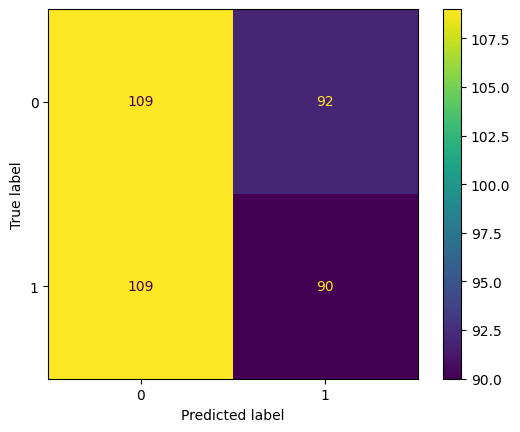

In [452]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [453]:
l = ['precision', 'recall', 'fscore', 'accuracy']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

precision = 0.4945054945054945
recall = 0.45226130653266333
fscore = 0.4724409448818898
accuracy = 0.4975


### Random Forest

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train, Y_train)

In [ ]:
Y_pred = rf_clf.predict(X_test)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
l = ['precision', 'recall', 'fscore', 'accuracy']
scores = [precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred), f1_score(Y_test, Y_pred), accuracy_score(Y_test, Y_pred)]
for i in range(4):
  print(l[i], '=', scores[i])

Random Forest Classifier performs is slightly better than a Decision Tree and Decision Tree is comparable with Random Guessing.

## Predicting Rating

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)
X_train = X_train.astype('int')
X_test = X_test.astype('int')
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

### Decision Tree Regressor

In [275]:
dtr_clf = DecisionTreeRegressor()

In [276]:
dtr_clf.fit(X_train, Y_train)

DecisionTreeRegressor()

In [277]:
Y_pred = dtr_clf.predict(X_test)

In [278]:
rmse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('rmse = ', rmse)
print('r2 score = ', r2)

rmse =  0.52
r2 score =  -1.0800520013000332


### Linear regression

In [279]:
lr_clf = LinearRegression()

In [280]:
lr_clf.fit(X_train, Y_train)

LinearRegression()

In [281]:
Y_pred = lr_clf.predict(X_test)

In [282]:
rmse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('rmse = ', rmse)
print('r2 score = ', r2)

rmse =  0.24771790493866863
r2 score =  0.009103607835521


Decision Tree Regressor is better than Linear Regressor